### 2.4 单样本t检验

#### 问题：样本均值与标准t分布均值是否存在显著性差异

#### 假设（α = 0.05）

* H0：不存在显著差异
* H1：存在显著差异


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [5]:
# 2.4.1 创建随机变量：t分布、自由度df

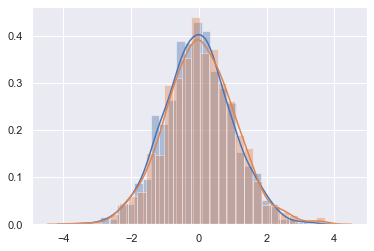

In [10]:
sns.set()

s0 = stats.norm.rvs(size=1000)
s1 = stats.t.rvs(20,size=1000) # 自由度越高，越接近正态分布，反之越离散

sns.distplot(s0)
sns.distplot(s1)

In [11]:
# 2.4.2 描述性统计：特征值
# 偏度（skewness）- 统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征
# 峰度（kurtosis）- 概率密度分布曲线在平均值处峰值高低的特征数，如果峰度大于三，峰的形状比较尖

In [19]:
# 方式1：调用统计函数
s1.mean(),s1.var(),s1.max(),s1.min()

(0.04578084653560904,
 1.0748266069427663,
 3.7221732316426634,
 -3.679705989889466)

In [26]:
# 方式2：调用describe
n,(smin,smax),sm,sv,sk,sr = stats.describe(s1)

In [29]:
m,v,s,k = stats.t.stats(n-1,moments='mvsk')
m,v,s,k

(array(0.), array(1.00200602), array(0.), array(0.00603015))

In [4]:
# 2.4.2 计算t值（类别数据）、p值（概率）

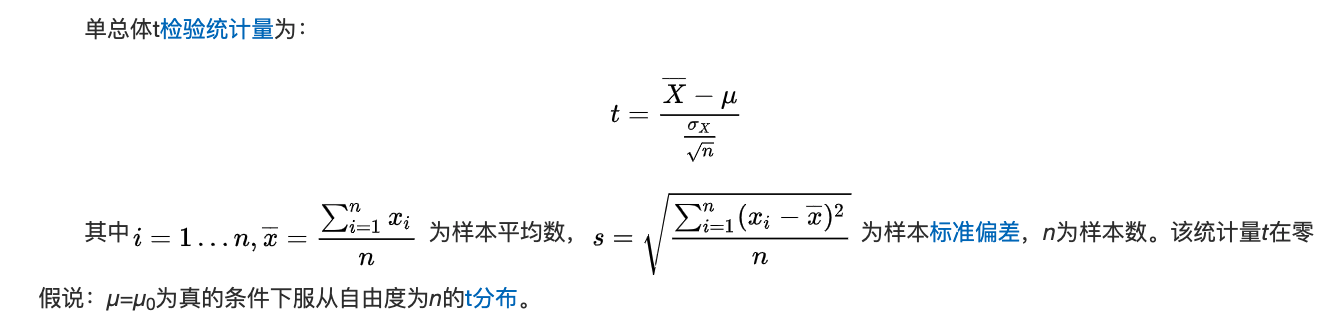

In [35]:
# 方式1：自己实现公式
tv = (sm - m) / np.sqrt(sv/n)
pv = stats.t.sf(np.abs(tv),n-1) * 2
tv,pv

(1.3957169692984173, 0.16310986201239033)

In [32]:
# 方式2：调用ttest

In [37]:
t,p = stats.ttest_1samp(s1,m)
t,p

(1.3957169692984173, 0.16310986201239033)

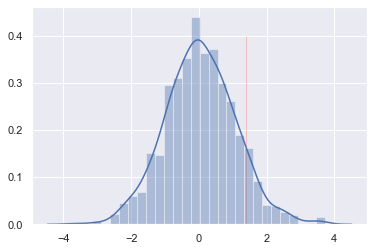

In [44]:
# t分布图
sns.distplot(s1)
sns.lineplot(x=[t,t],y=[0,0.4],color='red')

In [50]:
stats.kstest(s1, 'norm')

KstestResult(statistic=0.02192382601725501, pvalue=0.7223709378764447)